# IMPORT LIBRARIES

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# split data to training & test 
from sklearn.model_selection import train_test_split

# standard datasets
from sklearn.preprocessing import StandardScaler

# classifier algo
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

# clustering algo
from sklearn.cluster import KMeans

from sklearn import metrics


# HELPER FUNCTIONS

In [19]:
# Ref: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

def getPerfMeasures(y_true, y_pred):
    conf_matrix = metrics.confusion_matrix(y_true, y_pred)
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred, average = None)
    recall = metrics.recall_score(y_true, y_pred, average = None)
    f1_score = metrics.f1_score(y_true, y_pred, average = None)
    # todo: add Mean Absolute Error, Mean Squared Error
    return accuracy, precision, recall, f1_score

def viewConfMatrixAndPerfMeasures(y_true, y_pred):
    conf_matrix = metrics.confusion_matrix(y_true, y_pred)
    
    # use heatmap to get result
    sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Reds)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix')
    plt.tight_layout()
    
    # get performance measures
    accuracy, precision, recall, f1_score = getPerfMeasures(y_true, y_pred)
    print("Accuracy = ",accuracy, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", f1_score)
    print(conf_matrix)
#     print (f"{i:<9}{data.columns[i]:<30}{c:<10}{len(data)-c: <10}")
    

# IMPORT DATA

In [20]:
#import dataset
data = pd.read_csv("../processed_data/spambase.csv")
data.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [21]:
print(data.columns)
print(len(data.columns))
print(len(data))

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


# EDA

In [ ]:
grouped_data = data.groupby(data['class'])
print(grouped_data[data.columns[0]].describe(include='all'))

In [ ]:
data[data[data.columns[0]] == 0]

In [ ]:
print (f"{'col_idx':<9}{'columns':<30}{'0s':<10}{'other': <10}")
for i in range(len(data.columns)):
    c = data[data[data.columns[i]] == 0].shape[0]
    print (f"{i:<9}{data.columns[i]:<30}{c:<10}{len(data)-c: <10}")

In [ ]:
# TODO: plot for all columns
import math
columns = len(data.columns)
print(columns)
for i in range(math.ceil(columns/10)):
    
    fig, axes = plt.subplots(1, 11, figsize = (20, 5))
    for j in range(10):
        if i * 10 + j < columns:
            sns.boxplot(x='class', y = data.columns[i * 10 + j], data = data, orient = 'v', ax = axes[j], whis=10)
    plt.tight_layout()
    plt.cla()

In [ ]:
## TODO: more EDA

# Data Modelling
## Classification
- Using Decision Tree, KNN, Naive Bayes & SVM

In [52]:
#Splitting dataset for classification

#creating test and train sets
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1],data['class'],test_size=0.25, random_state=0)
# print(len(x_train))
print("Test Data: ", len(x_test))
#creating validation set
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.25, random_state=0)

print("Train Data: ", len(x_train))
print("Validating Data: ", len(x_val))
# print(x_train)

Test Data:  1151
Train Data:  2587
Validating Data:  863
      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
3978            0.00               0.00           0.00           0.0   
3882            0.00               0.00           0.00           0.0   
1508            0.00               0.74           0.00           0.0   
1208            0.47               0.31           0.47           0.0   
369             0.00               0.00           1.34           0.0   
...              ...                ...            ...           ...   
657             0.00               0.66           0.66           0.0   
4522            0.00               0.00           0.00           0.0   
2235            0.00               0.00           0.00           0.0   
2086            0.00               0.00           0.00           0.0   
2206            0.00               0.00           1.29           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
3

In [51]:
#standardizing datasets for classification
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train))
x_val_scaled = pd.DataFrame(scaler.transform(x_val))
x_test_scaled = pd.DataFrame(scaler.transform(x_test))

           0         1         2         3         4         5         6   \
0    0.545824 -0.165386  0.359786 -0.050486  0.630765 -0.339247 -0.302192   
1   -0.001410 -0.165386 -0.104279 -0.050486 -0.455181  0.045695 -0.302192   
2   -0.335831 -0.165386 -0.568344 -0.050486 -0.455181 -0.339247 -0.302192   
3   -0.335831 -0.165386 -0.568344 -0.050486 -0.455181 -0.339247 -0.302192   
4   -0.001410 -0.074104  0.148847 -0.050486 -0.291545 -0.339247 -0.302192   
..        ...       ...       ...       ...       ...       ...       ...   
858 -0.335831 -0.165386 -0.568344 -0.050486 -0.455181 -0.339247 -0.302192   
859 -0.123018 -0.165386 -0.420687 -0.050486 -0.455181 -0.094284 -0.302192   
860  0.910647 -0.165386  0.296504 -0.050486 -0.455181  1.095536 -0.302192   
861  0.302609 -0.165386  0.317598 -0.050486  3.323317 -0.339247 -0.302192   
862 -0.092616 -0.165386 -0.399593 -0.050486 -0.455181 -0.059289 -0.302192   

           7         8         9   ...        47        48        49  \
0  

### Classification: Decision Tree

In [7]:
# train with Decision Tree
decisionTreeClf = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
decisionTreeClf.fit(x_train_scaled,y_train)

# estimate the skill of model -> lest try with validation dataset
y_val_pred = decisionTreeClf.predict(x_val_scaled)

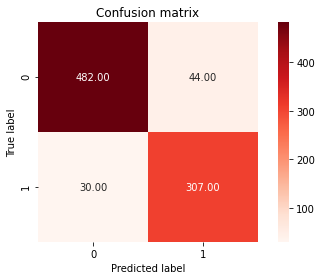

In [8]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

In [ ]:
# TODO: How to get best attributes?

### Classification: K Nearest Neighbors

In [ ]:
# train with KNN
# Using K = 3
knnClf = KNeighborsClassifier(n_neighbors = 3, weights='distance')  
knnClf.fit(x_train_scaled,y_train)

# estimate the skill of model with validation dataset
y_val_pred = knnClf.predict(x_val_scaled)

In [ ]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

In [ ]:
# Finding the best K value
max_acc = 0
optimal_k = 1
print (f"{'K value':<10}{'Acurracy':<20}{'Precision':<20}{'Recall': <20}{'F1 Score': <20}")
for k in range(1, 20):
    knnClf = KNeighborsClassifier(n_neighbors = k, weights='distance')  
    knnClf.fit(x_train_scaled,y_train)
    y_val_pred = knnClf.predict(x_val_scaled)
    
    accuracy, precision, recall, f1_score = getPerfMeasures(y_val, y_val_pred)
    
    # decide optimal K based on optimal accuracy (is this right?)
    if max_acc < accuracy:
        max_acc = accuracy
        optimal_k = k
    print (f"{k:<10}{accuracy:<20}{precision[0]:<20}{recall[0]: <20}{f1_score[0]: <20}")
print()
print (f"{'Optimal k: ':<15}{optimal_k:<20}")
print (f"{'Accuracy ':<15}{max_acc:<20}")

In [ ]:
# Use optimal k for validate dataset
knnClf = KNeighborsClassifier(n_neighbors = optimal_k, weights='distance')  
knnClf.fit(x_train_scaled,y_train)
y_val_pred = knnClf.predict(x_val_scaled)

viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

### Classification: Naive Bayes

#### Gaussian Naive Bayes

In [32]:
# train with Gaussian Naive Bayes
nbClf = GaussianNB()  
nbClf.fit(x_train_scaled,y_train)

# estimate the skill of model with validation dataset
y_val_pred = nbClf.predict(x_val_scaled)

Accuracy =  0.8111239860950173 
Precision = [0.96183206 0.68510638] 
Recall =  [0.71863118 0.95548961] 
F1 Score =  [0.8226333  0.79801735]
[[378 148]
 [ 15 322]]


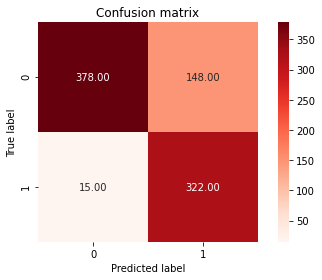

In [33]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

#### Multinomial Naive Bayes

In [58]:
# train with Multinomial Naive Bayes
nbClf = MultinomialNB()  
nbClf.fit(x_train,y_train)

# estimate the skill of model with validation dataset
y_val_pred = nbClf.predict(x_val_scaled)

Accuracy =  0.6871378910776361 
Precision = [0.98854962 0.55574043] 
Recall =  [0.49239544 0.99109792] 
F1 Score =  [0.65736041 0.71215352]
[[259 267]
 [  3 334]]


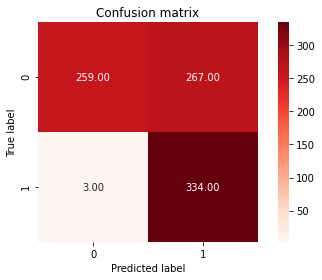

In [44]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

#### Bernoulli Naive Bayes

In [55]:
# train with Bernoulli Naive Bayes
nbClf = BernoulliNB()  
nbClf.fit(x_train_scaled,y_train)

# estimate the skill of model with validation dataset
y_val_pred = nbClf.predict(x_val_scaled)

Accuracy =  0.9061413673232909 
Precision = [0.9009009  0.91558442] 
Recall =  [0.95057034 0.83679525] 
F1 Score =  [0.92506938 0.8744186 ]
[[500  26]
 [ 55 282]]


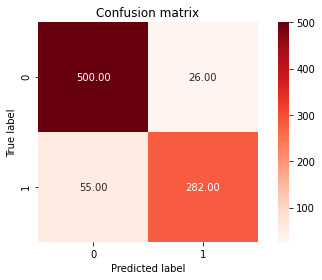

In [56]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

### Classification: SVM

In [ ]:
# train with SVM
svmClf = SVC(kernel = 'rbf', gamma = 'auto')  
svmClf.fit(x_train_scaled,y_train)

# estimate the skill of model with validation dataset
y_val_pred = svmClf.predict(x_val_scaled)

In [ ]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

## Performance Test
### Use SVM for test dataset

In [ ]:
y_test_pred = svmClf.predict(x_test_scaled)

In [ ]:
viewConfMatrixAndPerfMeasures(y_test,y_test_pred)